In [306]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro # для проверки нормальности
from scipy.stats import levene # для проверки гомогенности дисперсий
from scipy.stats import ttest_ind # для проверки различий двух выборок

In [287]:
data = [
    
    ## trolleybus
    ('10:23:00', '11:05:00', 't', 'd'),
    ('10:52:00', '11:32:00', 't', 'd'),
    ('08:00:00', '08:40:00', 't', 'd'),
    ('07:59:00', '08:42:00', 't', 'd'),
    ('08:06:00', '08:47:00', 't', 'd'),
    ('08:12:00', '08:58:00', 't', 'd'),
    ('08:19:00', '09:12:00', 't', 'd'),
    ('08:19:00', '09:09:00', 't', 'd'),
    ('08:05:00', '08:47:00', 't', 'd'),
    ('18:08:00', '18:55:00', 't', 'a'),
    ('18:15:00', '19:10:00', 't', 'a'),
    ('19:12:00', '19:55:00', 't', 'a'),
    ('19:22:00', '20:01:00', 't', 'a'),
    ('08:10:00', '08:55:00', 't', 'd'),
    ('09:15:00', '09:55:00', 't', 'd'),
    ('08:07:00', '08:49:00', 't', 'd'),
    ('18:08:00', '18:55:00', 't', 'a'),
    ('18:12:00', '19:05:00', 't', 'a'),
    ('19:15:00', '20:01:00', 't', 'a'),
    ('09:20:00', '10:02:00', 't', 'd'),
    ('08:15:00', '09:03:00', 't', 'd'),
    ('09:12:00', '09:55:00', 't', 'd'),
    ('18:20:00', '19:07:00', 't', 'a'),
    ('19:14:00', '19:58:00', 't', 'a'),
    ('18:07:00', '18:55:00', 't', 'a'),
    ('08:15:00', '08:51:00', 't', 'd'),
    ('09:14:00', '09:55:00', 't', 'd'),
    ('09:25:00', '10:04:00', 't', 'd'),
    ('08:12:00', '08:53:00', 't', 'd'),
    ('08:12:00', '08:53:00', 't', 'd'),
    ('19:07:00', '19:55:00', 't', 'a'),
    ('19:07:00', '19:55:00', 't', 'a'),
    ('18:07:00', '19:02:00', 't', 'a'),
    ('18:25:00', '19:13:00', 't', 'a'),
    ('19:12:00', '20:01:00', 't', 'a'),
    
    ## metro
    ('18:36:00', '19:11:00', 'm', 'a'),
    ('08:03:00', '08:37:00', 'm', 'd'),
    ('18:06:00', '18:41:00', 'm', 'a'),
    ('18:00:00', '18:38:00', 'm', 'a'),
    ('18:12:00', '18:50:00', 'm', 'a'),
    ('18:18:00', '18:55:00', 'm', 'a'),
    ('08:04:00', '08:48:00', 'm', 'd'),
    ('08:22:00', '08:57:00', 'm', 'd'),
    ('18:14:00', '18:51:00', 'm', 'a'),
    ('08:34:00', '09:08:00', 'm', 'd'),
    ('18:04:00', '18:41:00', 'm', 'a'),
    ('08:31:00', '09:05:00', 'm', 'd'),
    ('17:47:00', '18:26:00', 'm', 'a'),
    ('08:35:00', '09:08:00', 'm', 'd'),
    ('09:27:00', '10:06:00', 'm', 'd'),
    ('17:31:00', '18:10:00', 'm', 'a'),
    ('08:34:00', '09:08:00', 'm', 'd'),
    ('17:25:00', '18:01:00', 'm', 'a'),
    ('08:40:00', '09:12:00', 'm', 'd'),
    ('17:47:00', '18:26:00', 'm', 'a'), 
    ('08:36:00', '09:11:00', 'm', 'd'),
    ('17:55:00', '18:32:00', 'm', 'a'), 
    ('08:38:00', '09:14:00', 'm', 'd'),
    ('18:01:00', '18:37:00', 'm', 'a'), 
    ('09:47:00', '10:28:00', 'm', 'd'),
    ('18:31:00', '19:02:00', 'm', 'a'),
    ('17:59:00', '18:38:00', 'm', 'a'),
    ('08:43:00', '09:20:00', 'm', 'd'),
    ('08:51:00', '09:29:00', 'm', 'd'),
    ('18:05:00', '18:44:00', 'm', 'a'), 
    ('09:02:00', '09:41:00', 'm', 'd'),
    ('18:22:00', '18:59:00', 'm', 'a'), 
    ('08:36:00', '09:10:00', 'm', 'd'),
    ('08:43:00', '09:19:00', 'm', 'd'),
    ('08:38:00', '09:15:00', 'm', 'd')
    
]

In [288]:
df = pd.DataFrame(data, columns=['start_time', 'end_time', 'ride type', 'departure_arrive'])

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   start_time        70 non-null     object
 1   end_time          70 non-null     object
 2   ride type         70 non-null     object
 3   departure_arrive  70 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB


In [290]:
# Преобразуем к datetime для расчета duration
start_dt = pd.to_datetime(df['start_time'], format='%H:%M:%S')
end_dt = pd.to_datetime(df['end_time'], format='%H:%M:%S')

# duration в минутах
df['duration'] = (end_dt - start_dt).dt.total_seconds() / 60

# Возвращаем формат к начальному
df['start_time'] = start_dt.dt.time
df['end_time'] = end_dt.dt.time 

df

,start_time,end_time,ride type,departure_arrive,duration
0,10:23:00,11:05:00,t,d,42.0
1,10:52:00,11:32:00,t,d,40.0
2,08:00:00,08:40:00,t,d,40.0
3,07:59:00,08:42:00,t,d,43.0
4,08:06:00,08:47:00,t,d,41.0
...,...,...,...,...,...
65,09:02:00,09:41:00,m,d,39.0
66,18:22:00,18:59:00,m,a,37.0
67,08:36:00,09:10:00,m,d,34.0
68,08:43:00,09:19:00,m,d,36.0


In [291]:
# Группировка по типу транспорта и вывод статистики для каждого типа
statistics = df.groupby('ride type')['duration'].describe().T
print(statistics)

ride type         m          t
count      35.00000  35.000000
mean       36.60000  44.914286
std         2.61444   4.755006
min        31.00000  36.000000
25%        35.00000  41.000000
50%        37.00000  44.000000
75%        38.50000  48.000000
max        44.00000  55.000000


C:\Users\andrey\AppData\Local\Temp\ipykernel_10252\3436510569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='ride type', y='duration', data=df, palette='Set2')
C:\Users\andrey\AppData\Local\Temp\ipykernel_10252\3436510569.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Trolleybus', 'Metro'])


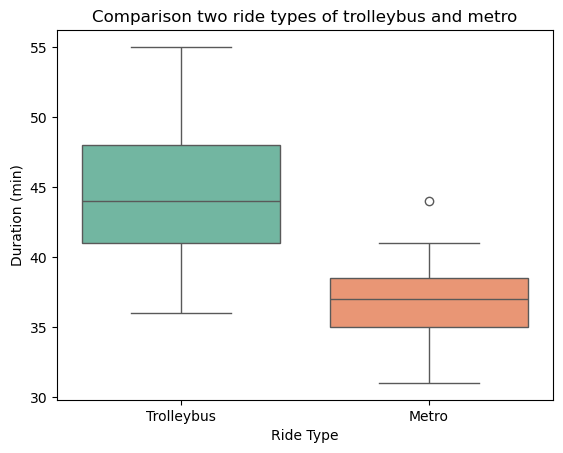

In [292]:
# Построим boxplot для визуализации различий между типами транспорта
ax = sns.boxplot(x='ride type', y='duration', data=df, palette='Set2')
plt.title('Comparison two ride types of trolleybus and metro')
plt.xlabel('Ride Type')
plt.ylabel('Duration (min)')
ax.set_xticklabels(['Trolleybus', 'Metro'])
plt.show()

In [293]:
# Перед применением статистических тестов, разделим поездки на троллейбусе и метро по группам 
metro = df[df['ride type'] == 'm']['duration']
trolleybus = df[df['ride type'] == 't']['duration']

In [294]:
print(metro.tolist())

[35.0, 34.0, 35.0, 38.0, 38.0, 37.0, 44.0, 35.0, 37.0, 34.0, 37.0, 34.0, 39.0, 33.0, 39.0, 39.0, 34.0, 36.0, 32.0, 39.0, 35.0, 37.0, 36.0, 36.0, 41.0, 31.0, 39.0, 37.0, 38.0, 39.0, 39.0, 37.0, 34.0, 36.0, 37.0]


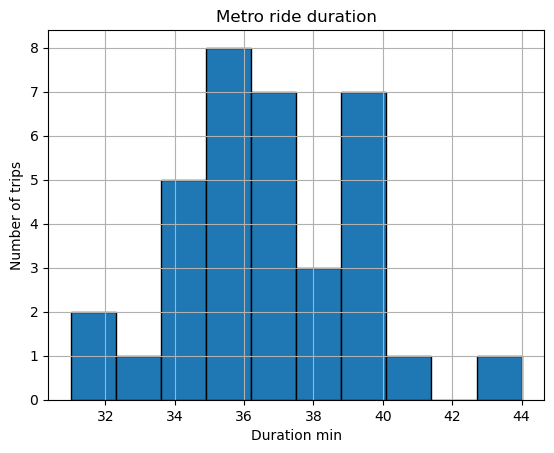

In [295]:
metro.hist(bins=10, edgecolor='black')
plt.title('Metro ride duration')
plt.xlabel('Duration min')
plt.ylabel('Number of trips')
plt.grid(True)
plt.show()

In [296]:
# Распределение времени поездки на метро похоже на нормальное, проведем тест 
# Шапиро-Уилка 

stat, p_value_metro = shapiro(metro)
print(f'Metro: Statistics={stat:.3f}, p-value={p_value_metro:.3f}')

Metro: Statistics=0.966, p-value=0.335


In [297]:
# p > 0.05, у нас нет оснований отклонить нулевую гипотезу о нормальном распределении данных

In [298]:
print(trolleybus.tolist())

[42.0, 40.0, 40.0, 43.0, 41.0, 46.0, 53.0, 50.0, 42.0, 47.0, 55.0, 43.0, 39.0, 45.0, 40.0, 42.0, 47.0, 53.0, 46.0, 42.0, 48.0, 43.0, 47.0, 44.0, 48.0, 36.0, 41.0, 39.0, 41.0, 41.0, 48.0, 48.0, 55.0, 48.0, 49.0]


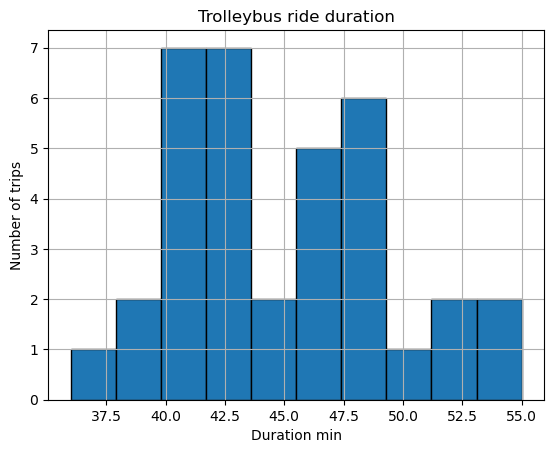

In [299]:
trolleybus.hist(bins=10, edgecolor='black')
plt.title('Trolleybus ride duration')
plt.xlabel('Duration min')
plt.ylabel('Number of trips')
plt.grid(True)
plt.show()

In [300]:
# Распределение времени поездки на троллейбусе похоже на нормальное, проведем тест 
# Шапиро-Уилка 

stat, p_value_trolleybus = shapiro(trolleybus)
print(f'Trolleybus: Statistics={stat:.3f}, p-value={p_value_trolleybus:.3f}')

Trolleybus: Statistics=0.952, p-value=0.129


In [301]:
# p > 0.05, у нас нет оснований отклонить нулевую гипотезу о нормальном распределении данных

In [310]:
# Проверим гомогенность дисперсий с помощью критерия Левена 
stat, p_value = levene(metro, trolleybus)
print(f'Levene test: Statistics={stat:.3f}, p-value={p_value:.3f}')

Levene test: Statistics=12.765, p-value=0.001


In [311]:
# p-value < 0.05, отвергаем нулевую гипотезу о том, что дисперсии одинаковы

In [312]:
# Так как распределение данных в наборе данных metro и trolleybus является нормальным, но дисперсии различны,
# целесообразно применить t-критерий Уэлча, выглядит так же как t-test с аргументом equal_var=False

# Применяем тест Уэлча (t-test с unequal variances)
stat, p_value = ttest_ind(metro, trolleybus, equal_var=False)

# Выводим результат
print(f'Welch t-test: Statistics={stat:.3f}, p-value={p_value:.3f}')

Welch t-test: Statistics=-9.065, p-value=0.000


In [303]:
# По результатам теста видим, что выборки значимо различаются, p < 0.05

C:\Users\andrey\AppData\Local\Temp\ipykernel_10252\973961122.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Trolleybus', 'Metro'])


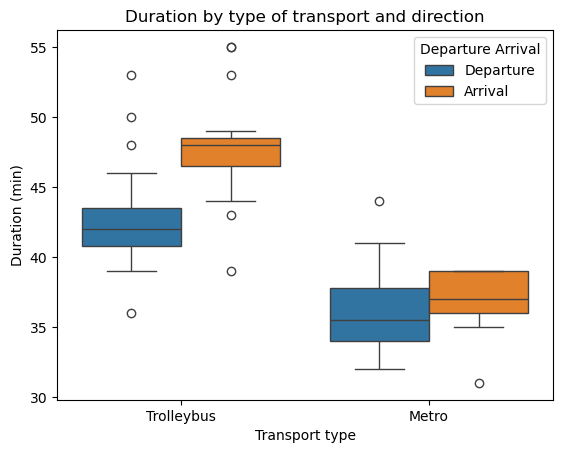

In [304]:
# Построение boxplot для видов транспорта и отправления и прибытия 

ax = sns.boxplot(x='ride type', y='duration', hue='departure_arrive', data=df)

# Названия оси X
ax.set_xticklabels(['Trolleybus', 'Metro'])

# Изменение названий в легенде
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Departure', 'Arrival']  # Новые подписи для легенды
ax.legend(handles, new_labels, title='Departure Arrival')

plt.title('Duration by type of transport and direction')
plt.xlabel('Transport type')
plt.ylabel('Duration (min)')
plt.show()

In [ ]:
# Видим различия для arrival и department, притом для metro boxplot пересекаются, что говорит нам о том,
# что нет значимых различий для утреннего и вечернего времени

# Для trolleybus видим значимые различия для утреннего и вечернего времени, что может свидетельствовать 
# о том, что вечером возникают пробки, которые и увеличивают интервал времени

In [ ]:
# По результатам исследования, можно сделать следующие выводы 

# 1. Есть значимые различия между временем поездки на метро и на троллейбусе

# 2. Для передвижений на троллейбусе значимым фактором является утреннее и вечернее время, вечером интервал 
# времени как правило больше

# 3. Также можно заметить, что количество outliers для троллейбуса больше, чем для метро, что говорит нам о 
# меньшей предсказуемости этого вида транспорта и различных факторах, которые влияют на время поездки на нем

# В целом же можно сделать вывод, что метро быстрее и менее подвержено временным колебаниям

In [321]:
# Произведем подготовку Dataset для последующего анализа в R 

In [324]:
# Преобразуем start_time в формат времени (если ещё не сделано)
df['start_time'] = pd.to_datetime(df['start_time'], format='%H:%M:%S')
df['start_hour'] = df['start_time'].dt.hour 

df['start_time'] = start_dt.dt.time
df

,start_time,end_time,ride type,departure_arrive,duration,start_hour
0,10:23:00,11:05:00,t,d,42.0,10
1,10:52:00,11:32:00,t,d,40.0,10
2,08:00:00,08:40:00,t,d,40.0,8
3,07:59:00,08:42:00,t,d,43.0,7
4,08:06:00,08:47:00,t,d,41.0,8
...,...,...,...,...,...,...
65,09:02:00,09:41:00,m,d,39.0,9
66,18:22:00,18:59:00,m,a,37.0,18
67,08:36:00,09:10:00,m,d,34.0,8
68,08:43:00,09:19:00,m,d,36.0,8


In [326]:
# Выгрузим файл в .csv для последующего анализа в R
df.to_csv("ride_data.csv", index=False)

In [327]:
df

,start_time,end_time,ride type,departure_arrive,duration,start_hour
0,10:23:00,11:05:00,t,d,42.0,10
1,10:52:00,11:32:00,t,d,40.0,10
2,08:00:00,08:40:00,t,d,40.0,8
3,07:59:00,08:42:00,t,d,43.0,7
4,08:06:00,08:47:00,t,d,41.0,8
...,...,...,...,...,...,...
65,09:02:00,09:41:00,m,d,39.0,9
66,18:22:00,18:59:00,m,a,37.0,18
67,08:36:00,09:10:00,m,d,34.0,8
68,08:43:00,09:19:00,m,d,36.0,8
